# Project: Investigate a Dataset - [Soccer]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Soccer Database**: It contains data for soccer matches, players, and teams from several European countries during the period/seasons from 2008/2009 to 2015/ 2016 located in `Match`, `Player`, `Team`, and `Country` tables respectively.
In addition, data describe the number of stages for each season, and the number of the matches for each stage. 
Also there are tables to describe the characteristics of each player called `Player_Attributes`, and `Team_Attributes` to describe the characteristics of the team during the season as well.
. 


### Question(s) for Analysis
1. Is there a relation between the average overall rating and the age of the player over time?
2. What teams improved the most over the time period?
3. What team attributes lead to the most victories?

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from datetime import datetime, timedelta

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the data are loaded, checked for cleanliness, trimmed and cleaned for analysis.


### Gathering the data 

In [2]:
# The tables exist inside a folder called 'Database_soccer'
folder_name = 'Database_Soccer'
def load_table(file_name):
    df = pd.read_csv(os.path.join(folder_name, file_name))
    return df

In [3]:
# Load dataframes
df_country = load_table('Country.csv')
df_match = load_table('Match.csv')
df_player = load_table('Player.csv')
df_player_attrs = load_table('Player_Attributes.csv')
df_team = load_table('Team.csv')
df_team_attrs = load_table('Team_Attributes.csv')

A function is to inspect the dataframe: a number of missing and duplicates values, etc.

In [4]:
def inspect_dataframe(df):
    num_duplicates = 0
    is_missing_val = False
    num_duplicates = df.duplicated().sum()
    is_missing_val = df.isnull().sum().any()
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    print("Dataframe has {} rows and {} columns with {} duplicates. Is there missing value? {}\n".format(num_rows, num_cols,
                                                                                                          num_duplicates, is_missing_val))

**Inspecting: *Country* dataframe.**

> Country dataframe contains (2) columns [id, name], with no missing or duplicated values, and datatypes of columns make sense.

In [5]:
# Inspect Country dataframe:
inspect_dataframe(df_country)
df_country.info()
df_country.head()

Dataframe has 11 rows and 2 columns with 0 duplicates. Is there missing value? False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


**Inspecting: *Player* dataframe.**

>Player dataframe contains (7) columns [id, player_api_id,player_name, ..], with no missing or duplicated values.<br> A 'birthday' column datatype should be converted to datetime.

In [6]:
# Inspect Player dataframe:
inspect_dataframe(df_player)
df_player.info()
df_player.head()

Dataframe has 11060 rows and 7 columns with 0 duplicates. Is there missing value? False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


**Inspecting: *Player Attributes* dataframe.**

> Player Attributes dataframe contains (42) columns [id, player_api_id,player_name, ..], with no duplicated values.<br>
Only (5) columns [id, player_fifa_api_id, player_api_id, date, overall_rating] are used in the data analysis,
and the rest of columns are dropped.<br>
There are (836) missing values for overall-rating column.<br>
Also the data type of date column should be converted to datetime, and overall_rating col. to int datatype.

In [7]:
# Inspect Player Attributes dataframe:
inspect_dataframe(df_player_attrs)
df_player_attrs.info()
print('\nNumber of missing values of overall rating col.: ',df_player_attrs.overall_rating.isnull().sum())

Dataframe has 183978 rows and 42 columns with 0 duplicates. Is there missing value? True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passi

**Inspecting: *Team* dataframe.**

>Team dataframe contains (5) columns [id, team_api_id, team_fifa_api_id, team_long_name, team_short_name],
 with no duplicated values for a whole record, but there are missing values.<br>
After more inspecting on the missing values, it is found that:<br>
(10) missing values and (3) duplicated values [111560.0, 111429.0, 301.0] for team_fifa_api_id with different team_api_ids.

In [8]:
# Inspect Team dataframe:
inspect_dataframe(df_team)
df_team.info()
team_duplicates = df_team[df_team['team_fifa_api_id'].duplicated()]
team_duplicates

Dataframe has 299 rows and 5 columns with 0 duplicates. Is there missing value? True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
14,15,4049,NaN,Tubize,TUB
24,2510,274581,111560.0,Royal Excel Mouscron,MOP
170,26561,6601,NaN,FC Volendam,VOL
183,31445,8020,111429.0,Polonia Bytom,GOR
199,32409,8024,301.0,Widzew Łódź,WID
204,34816,177361,NaN,Termalica Bruk-Bet Nieciecza,TBN
208,35286,7992,NaN,Trofense,TRO
213,35291,10213,NaN,Amadora,AMA
223,36248,9765,NaN,Portimonense,POR
225,36723,4064,NaN,Feirense,FEI


>The (3) duplicated values [111560.0, 111429.0, 301.0] for team_fifa_api_id with different team_api_ids.

In [9]:
# Inspect Team dataframe (cont.):
df_team.query('team_fifa_api_id in [111560.0, 111429.0, 301.0]')

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
15,16,9996,111560.0,Royal Excel Mouscron,MOU
24,2510,274581,111560.0,Royal Excel Mouscron,MOP
182,31444,8031,111429.0,Polonia Bytom,POB
183,31445,8020,111429.0,Polonia Bytom,GOR
189,31451,8244,301.0,Widzew Łódź,LOD
199,32409,8024,301.0,Widzew Łódź,WID


**Inspecting: *Team Attributes* dataframe.**

>Team Attributes dataframe contains (25) columns, with no duplicated values, but there are (969) missing values.<br>

>Because of a huge amount of missing values of a column 'buildUpPlayDribbling', and as an attempt to decrease
the number of the missing values:<br>
the missing values will be replaced by the `mean` value of each team. then dropping the rest missing values.<br>

>Also the datatype of a column 'buildUpPlayDribbling' will be converted from float to int, and a datatype of the column
date will be converted to datetime.


In [10]:
# Inspect Team Attributes dataframe:
inspect_dataframe(df_team_attrs)
df_team_attrs.info()
print('\nNumber of missing values of buildUpPlayDribbling col.: ',df_team_attrs.buildUpPlayDribbling.isnull().sum())

Dataframe has 1458 rows and 25 columns with 0 duplicates. Is there missing value? True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non

>Because of the relation between Team and Team_Attributes dataframes:<br>
The (3) duplicated values [111560.0, 111429.0, 301.0] of [team_fifa_api_id] column inside `Team` dataframe (mentioned above)
will be checked on the correct values inside `Team Attributes` dataframe before dropping the duplicates.

>After a Query, still there are duplicated team_fifa_api_id values with different two values team_api_id.<br>
So the data analysis will depend on team_api_id and the column team_fifa_api_id will be removed
from all tables: `Team`, `Team Attributes`, and `Player Attributes` dataframes.

In [11]:
# A query about the duplicated values.
df_team_attrs.query('team_fifa_api_id in [111560.0, 111429.0, 301.0]').groupby(
    ['team_fifa_api_id', 'team_api_id']).size()

team_fifa_api_id  team_api_id
301               8024           4
                  8244           4
111429            8020           2
                  8031           2
111560            9996           2
                  274581         1
dtype: int64

**Inspecting: *Match* dataframe.**

>Match dataframe contains (115) columns, with no duplicated values, but there are (969) missing values.<br>
Only columns [country_id, season, stage, date, match_api_id, home_team_api_id,away_team_api_id, home_team_goal,
away_team_goal] will be used in the data analysis phase.<br>
The datatype of date column will be converted to datetime.

In [12]:
# Inspect Match dataframe:
inspect_dataframe(df_match)
df_match.info()
df_match.head()

Dataframe has 25979 rows and 115 columns with 0 duplicates. Is there missing value? True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


## Data Cleaning
Cleaning each dataframe according to what mentioned above.
>  Also remove **`id`** column from each dataframe which only refers to the serial row number and check again about duplicates.


In [13]:
# A function to drop columns from a dataframe.
def drop_columns(df, cols):
    df = df.drop(columns = cols)
    return df

In [14]:
# Afunction to remove the rows have missing values
def remove_missing(df, missing_col):
    missing_rows = (df[missing_col].isnull() == True)
    df.drop(df[missing_rows].index, inplace=True)
    return df

In [15]:
# A function to fill the missing values of a specific column in an average value for selected items.
def fill_missing_values(df, name_null_col, name_selected_col, num_null_col, num_selected_col):
    list_means = {}
    null_items = df[df[name_null_col].isnull() ==True]
    for id in null_items[name_selected_col]:
        mean = df.query('{} == {}'.format(name_selected_col,id))[name_null_col].mean()
        list_means[id] = mean


    null_items = null_items.reset_index()
    for i in np.arange(0, len(null_items.index)):
            null_items.iloc[i, num_null_col + 1] = list_means[null_items.iloc[i, num_selected_col + 1]]

    df.drop(null_items['index'], inplace=True)
    null_items = drop_columns(null_items, ['index'])
    df = df.append(null_items, sort=False, ignore_index=True)
    
    return df

**Cleaning: *Player* dataframe.**

In [16]:
# Convert datatype of 'birthday' column to datetime datatype.
df_player['birthday'] = pd.to_datetime(df_player['birthday'])

In [17]:
# Remove id column and check about duplicates again
df_player = drop_columns(df_player, ['id', 'player_fifa_api_id'])

In [18]:
# Cleaned Player dataframe
inspect_dataframe(df_player)
df_player.info()

Dataframe has 11060 rows and 5 columns with 0 duplicates. Is there missing value? False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 5 columns):
player_api_id    11060 non-null int64
player_name      11060 non-null object
birthday         11060 non-null datetime64[ns]
height           11060 non-null float64
weight           11060 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 432.1+ KB


**Cleaning: *Player Attributes* dataframe.**

In [19]:
# Drop undesired columns
cols = []
for col in df_player_attrs.columns:
    if col not in ['player_api_id', 'date', 'overall_rating']:
        cols.append(col)
df_player_attrs = drop_columns(df_player_attrs, cols)

In [20]:
# Convert date column to datetime datatype
df_player_attrs['date'] = pd.to_datetime(df_player_attrs['date'])

In [21]:
# Fill null values of overall_rating in the mean of each player_api_id, location of col has a null value
# and the location of helping col. 
num_null_col = df_player_attrs.columns.get_loc('overall_rating')
num_selected_col = df_player_attrs.columns.get_loc('player_api_id')
df_player_attrs = fill_missing_values(df_player_attrs, 'overall_rating', 'player_api_id', num_null_col, num_selected_col)

In [22]:
# Convert the datetype of 'overall_rating' column to int
df_player_attrs['overall_rating'] = df_player_attrs.overall_rating.astype(int)

In [23]:
# inspect again after remove the id column from the dataframe.
inspect_dataframe(df_player_attrs)

Dataframe has 183978 rows and 3 columns with 55 duplicates. Is there missing value? False



In [24]:
# Remove the duplicates.
df_player_attrs.drop_duplicates(inplace = True)

In [25]:
# Cleaned Player_Attributes dataframe
inspect_dataframe(df_player_attrs)
df_player_attrs.info()

Dataframe has 183923 rows and 3 columns with 0 duplicates. Is there missing value? False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183923 entries, 0 to 183977
Data columns (total 3 columns):
player_api_id     183923 non-null int64
date              183923 non-null datetime64[ns]
overall_rating    183923 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 5.6 MB


**Cleaning: *Team* dataframe.**

In [26]:
# Drop undesired columns and inspect again on duplicated values.
df_team = drop_columns(df_team, ['id', 'team_fifa_api_id'])
inspect_dataframe(df_team)
df_team.info()

Dataframe has 299 rows and 3 columns with 0 duplicates. Is there missing value? False

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
team_api_id        299 non-null int64
team_long_name     299 non-null object
team_short_name    299 non-null object
dtypes: int64(1), object(2)
memory usage: 7.1+ KB


**Cleaning: *Team Attributes* dataframe.**

In [27]:
# Drop undesired columns and inspect again on duplicated values.
df_team_attrs = drop_columns(df_team_attrs, ['id', 'team_fifa_api_id'])
inspect_dataframe(df_team_attrs)

Dataframe has 1458 rows and 23 columns with 1 duplicates. Is there missing value? True



In [28]:
# Convert the datetype of 'date' column to datetime
df_team_attrs['date'] = pd.to_datetime(df_team_attrs['date'])

In [29]:
# Fill null values of buildUpPlayDribbling in the mean of each team_api_id
num_null_col = df_team_attrs.columns.get_loc('buildUpPlayDribbling')
num_selected_col = df_team_attrs.columns.get_loc('team_api_id')
df_team_attrs = fill_missing_values(df_team_attrs, 'buildUpPlayDribbling', 'team_api_id', num_null_col, num_selected_col)

In [30]:
# Remove duplicates and inspect again
df_team_attrs = df_team_attrs.drop_duplicates()
inspect_dataframe(df_team_attrs)

Dataframe has 1457 rows and 23 columns with 0 duplicates. Is there missing value? True



In [31]:
# Inspect again on missing values: the number of missing values (62) is less than the previous value(969)
inspect_dataframe(df_team_attrs)
print('Number of missing values of buildUpPlayDribbling col.: ',df_team_attrs.buildUpPlayDribbling.isnull().sum())

Dataframe has 1457 rows and 23 columns with 0 duplicates. Is there missing value? True

Number of missing values of buildUpPlayDribbling col.:  62


In [32]:
# Remove the missing values of 'buildUpPlayDribbling' before converting the datatype
df_team_attrs = remove_missing(df_team_attrs, 'buildUpPlayDribbling')

In [33]:
# Convert the datetype of 'buildUpPlayDribbling' column to int
df_team_attrs['buildUpPlayDribbling'] = df_team_attrs.buildUpPlayDribbling.astype(int)

In [34]:
# Cleaned Team_Attributes dataframe
inspect_dataframe(df_team_attrs)
df_team_attrs.info()

Dataframe has 1395 rows and 23 columns with 0 duplicates. Is there missing value? False

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1457
Data columns (total 23 columns):
team_api_id                       1395 non-null int64
date                              1395 non-null datetime64[ns]
buildUpPlaySpeed                  1395 non-null int64
buildUpPlaySpeedClass             1395 non-null object
buildUpPlayDribbling              1395 non-null int64
buildUpPlayDribblingClass         1395 non-null object
buildUpPlayPassing                1395 non-null int64
buildUpPlayPassingClass           1395 non-null object
buildUpPlayPositioningClass       1395 non-null object
chanceCreationPassing             1395 non-null int64
chanceCreationPassingClass        1395 non-null object
chanceCreationCrossing            1395 non-null int64
chanceCreationCrossingClass       1395 non-null object
chanceCreationShooting            1395 non-null int64
chanceCreationShootingClass      

**Cleaning: *Match* dataframe.**

In [35]:
# Drop undesired columns and inspect again on duplicated values.
cols = []
for col in df_match.columns:
    if col not in ['country_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id',
                   'away_team_api_id', 'home_team_goal', 'away_team_goal']:
        cols.append(col)
        
df_match = drop_columns(df_match, cols)
inspect_dataframe(df_match)

Dataframe has 25979 rows and 9 columns with 0 duplicates. Is there missing value? False



<a id='eda'></a>
## Exploratory Data Analysis

In [36]:
#Explore more data about the player dataframe 
df_player.describe()[['height', 'weight']]

,height,weight
count,11060.000000,11060.000000
mean,181.867445,168.380289
std,6.369201,14.990217
min,157.480000,117.000000
25%,177.800000,159.000000
50%,182.880000,168.000000
75%,185.420000,179.000000
max,208.280000,243.000000


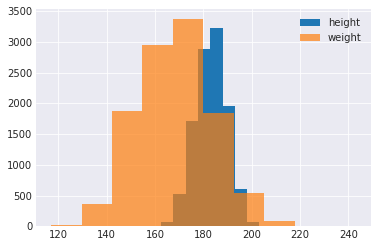

In [37]:
sns.set_style('dark')
df_player.height.hist(label = 'height')
df_player.weight.hist(label = 'weight', alpha=.7)
plt.legend();

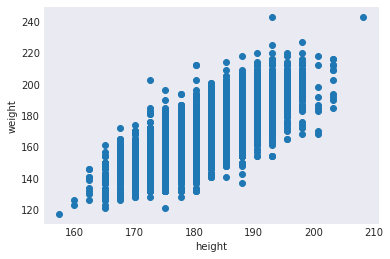

In [38]:
plt.scatter(x=df_player.height, y=df_player.weight)
plt.xlabel('height')
plt.ylabel('weight');

### Research Question 1 (Overall rating of a player changes over time?!)

In [39]:
# Overall rating over time for each player ..
# 1- Merge between player and player Attributes dataframes
df_player_merge = df_player_attrs.merge(df_player, left_on='player_api_id', right_on='player_api_id', how= 'inner')

# 2- Adding Age col. 
df_player_merge['age'] = df_player_merge['date'].dt.year - df_player_merge['birthday'].dt.year
df_player_merge.head()

,player_api_id,date,overall_rating,player_name,birthday,height,weight,age
0,505942,2016-02-18,67,Aaron Appindangoye,1992-02-29,182.88,187,24
1,505942,2015-11-19,67,Aaron Appindangoye,1992-02-29,182.88,187,23
2,505942,2015-09-21,62,Aaron Appindangoye,1992-02-29,182.88,187,23
3,505942,2015-03-20,61,Aaron Appindangoye,1992-02-29,182.88,187,23
4,505942,2007-02-22,61,Aaron Appindangoye,1992-02-29,182.88,187,15


In [40]:
# Choose adult players with average rate of each year.
df_adult_players = df_player_merge.query('age > 20')

df_adult_player_rates = df_adult_players.groupby(['player_api_id', 'age']).mean()['overall_rating'].reset_index(
    name='average_rate')

# Convert datatype of average_rate to int
df_adult_player_rates['average_rate'] = df_adult_player_rates['average_rate'].astype(int)

#Create a dictionary contains on a number of ratings for each player_api_id.
player_api_ids = df_adult_player_rates.player_api_id
list_obs = {}
for id in df_adult_player_rates.player_api_id:
    try:
        list_obs[id] = list_obs[id] + 1
    except:
        list_obs[id] = 1
        
#Choose a sample from (25) player_api_ids has 10 observations to check them as a series.
df_ids_obs = pd.DataFrame(list(list_obs.items()), columns=['player_api_id', 'num_obs'])
df_max_obs = df_ids_obs.query('num_obs == {}'.format(df_ids_obs.num_obs.max()))
sample_list = random.sample(list(df_max_obs['player_api_id']), 10)

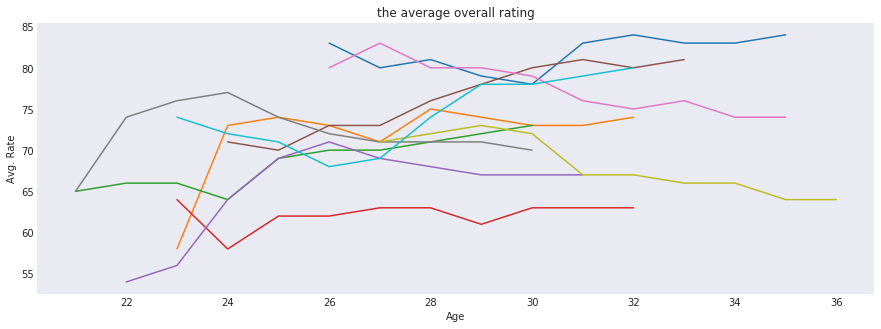

In [41]:
# Drawing Line plot
plt.figure(figsize=(15,5));
for id in sample_list:
    selected_id = df_adult_player_rates['player_api_id'] == id
    select_player = df_adult_player_rates[selected_id]
    x = select_player['age']  
    y = select_player['average_rate']
    plt.plot(x, y)
    plt.xlabel('Age')
    plt.ylabel('Avg. Rate')
    plt.title('the average overall rating');

In [42]:
# Do a Multiple linear regrssing between a dependent variable 'overall_rating' and independent variables:
# 'height', 'weight', and 'age.'

# 1- Import class and provide data.
from sklearn.linear_model import LinearRegression
x = np.array(df_player_merge[['height', 'weight', 'age']]) # x is a three-dimensional array with the three columns
y = np.array(df_player_merge['overall_rating']) # y is usually a one-dimensional array

# 2- Create the regression model as an instance of LinearRegression and fit it.
model = LinearRegression().fit(x, y)

# 3- Get results
r_sq = model.score(x, y) #  the value of 𝑅².
print("coefficient of determination: {}".format(r_sq))

print("intercept: {}".format(model.intercept_))

print("coefficients: {}".format(model.coef_))

coefficient of determination: 0.14452931009205783
intercept: 64.53026164820972
coefficients: [-0.08476564  0.03132761  0.55223598]


### Research Question 2 (What teams improved the most over the time period?!)

In [43]:
# A function to query inside the Match dataframe on a specific season and a specific country.
def get_hist_match_details(season, country_id):
    df = df_match.query('season == "{}" and country_id == {}'.format(season, country_id))
    return df

In [44]:
# A function to determine the winner team according to the total of goals (home and away goals.) 
def get_winner_team_id(df):
    # Order Teams According to points.
    home_goals = df.groupby('home_team_api_id')['home_team_goal'].sum()
    away_goals = df.groupby('away_team_api_id')['away_team_goal'].sum()
    df_series_list = [home_goals, away_goals]
    df_goals=pd.DataFrame(df_series_list)
    
    df_goals = df_goals.transpose()
    df_goals['total_goals'] = df_goals.sum(axis=1)
    max_goals = df_goals['total_goals'].max()
    
    return df_goals.query('total_goals == {}'.format(max_goals)).index[0]

In [45]:
# Create Function tells us number of stages, Number of matches and number of teams of each country   
list_dt = []
for season in df_match.season.unique():
    for id in df_country.id:
        df = get_hist_match_details(season, id)
        num_stages = df.stage.nunique()
        num_teams = df.home_team_api_id.nunique()
        total_matches = df.shape[0]
        num_matches_each_stage = int(total_matches / num_stages)
        winner_team_id = get_winner_team_id(df)
        list_dt.append({
            'season': season,
            'country_id': id,
            'num_teams': num_teams,
            'num_stages': num_stages,
            'num_matches_4stage': num_matches_each_stage,
            'total_matches': total_matches,
            'winner_team_id': winner_team_id
        })
df = pd.DataFrame(list_dt)
df.head(len(df_country)) 

,country_id,num_matches_4stage,num_stages,num_teams,season,total_matches,winner_team_id
0,1,9,34,18,2008/2009,306,8635
1,1729,10,38,20,2008/2009,380,8650
2,4769,10,38,20,2008/2009,380,8592
3,7809,9,34,18,2008/2009,306,8721
4,10257,10,38,20,2008/2009,380,8564
5,13274,9,34,18,2008/2009,306,8593
6,15722,8,30,16,2008/2009,240,10265
7,17642,8,30,16,2008/2009,240,9773
8,19694,6,38,12,2008/2009,228,9925
9,21518,10,38,20,2008/2009,380,8634


In [46]:
# A series of seasons for a specific country 4769
df.query('country_id == 4769')

,country_id,num_matches_4stage,num_stages,num_teams,season,total_matches,winner_team_id
2,4769,10,38,20,2008/2009,380,8592
13,4769,10,38,20,2009/2010,380,8639
24,4769,10,38,20,2010/2011,380,8639
35,4769,10,38,20,2011/2012,380,9847
46,4769,10,38,20,2012/2013,380,9847
57,4769,10,38,20,2013/2014,380,9847
68,4769,10,38,20,2014/2015,380,9847
79,4769,10,38,20,2015/2016,380,9847


In [47]:
# Customize 'df'
df_cust = pd.DataFrame({'count': df.groupby(['country_id', 'winner_team_id']).size()}).reset_index()
df_cust.head()

,country_id,winner_team_id,count
0,1,8342,2
1,1,8635,3
2,1,9987,1
3,1,9991,2
4,1729,8455,1


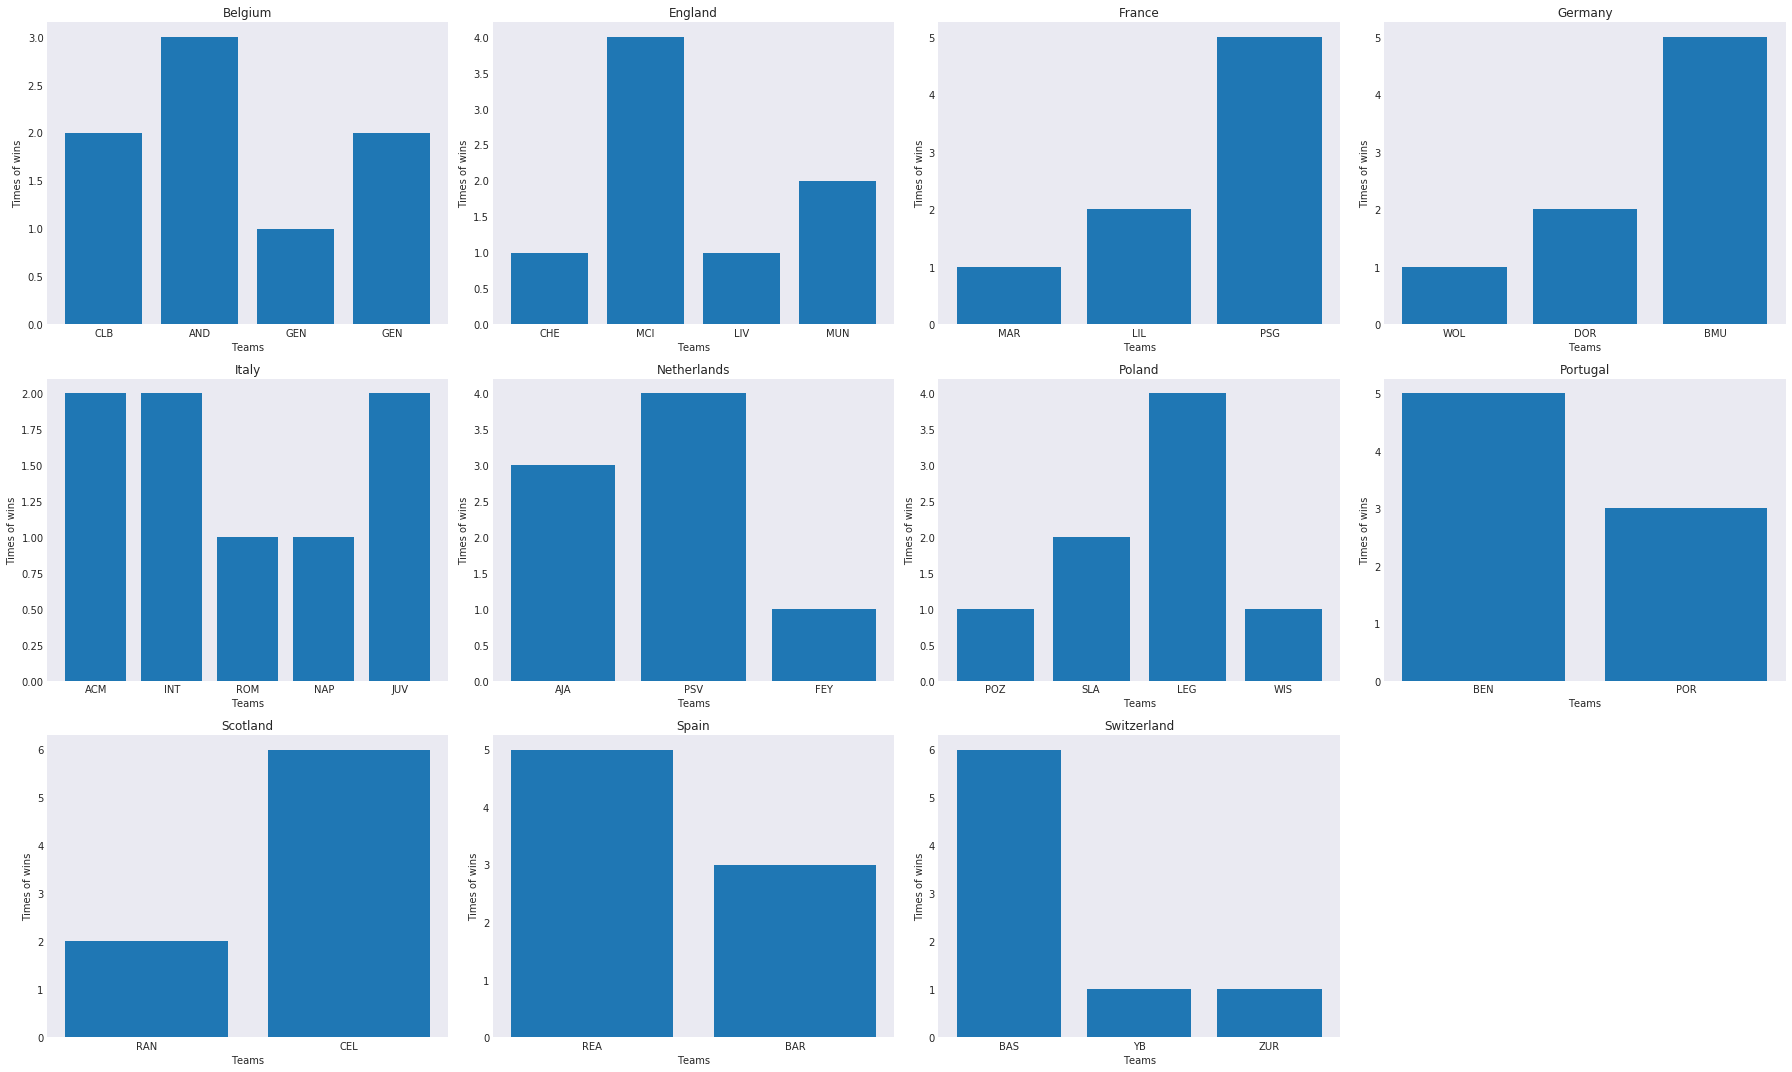

In [48]:
# Plot the top teams in each country over 8 seasons
fig = plt.figure(figsize=(25, 15))
plot_num = 1

list_name = []
for id in df_country['id']:
    top_teams = df.query('country_id == {}'.format(id)).groupby('winner_team_id')['season'].count()
    records = list(top_teams) 
    for i in top_teams.index:
            team_name = df_team.query('team_api_id == {}'.format(i))['team_short_name']
            list_name.append(list(team_name)[0])
    
    country_name = list(df_country.query('id == {}'.format(id))['name'])[0] 
    locations = np.arange(1, len(list_name) + 1)
    
    sub = plt.subplot(3, 4, plot_num)
    plt.bar(locations, records, tick_label = list_name)
    plt.title(country_name)
    plt.ylabel('Times of wins')
    plt.xlabel('Teams')
    #plt.xticks(rotation = 45)
    
    plot_num += 1
    list_name.clear()
# set the spacing between subplots
fig.tight_layout()

### Research Question 3  (What team attributes lead to the most victories?!)

In [49]:
# Order Teams According to number of goals.
def get_rates_team_ids(df):
    home_goals = df.groupby('home_team_api_id')['home_team_goal'].sum()
    away_goals = df.groupby('away_team_api_id')['away_team_goal'].sum()
    df_series_list = [home_goals, away_goals]
    df_goals=pd.DataFrame(df_series_list)
    df_goals = df_goals.transpose()
    df_goals['total_goals'] = df_goals.sum(axis=1)
    return df_goals

In [50]:
# A history/rate of a specific team comparison with other teams in each country over time/seasons.
def hist_teams_of_country(country_id):
    dfx = pd.DataFrame(columns=['index', 'season', 'country_id', 'home_team_goal', 'away_team_goal', 'total_goals'])
    for season in df_match.season.unique():
        df = get_hist_match_details(season, country_id)
        ratings_teams = get_rates_team_ids(df)
        ratings_teams.sort_values('total_goals', inplace=True)
        ratings_teams.reset_index(inplace=True)
        ratings_teams['season'] = np.repeat(season, len(ratings_teams.index))
        ratings_teams['country_id'] = np.repeat(country_id, len(ratings_teams.index))
        ratings_teams['order_team'] = np.arange(len(ratings_teams.index), 0, -1)
        dfx = dfx.append(ratings_teams, sort=False, ignore_index=True)
    
    dfx['order_team'] = dfx['order_team'].astype(int)
    dfx = dfx.rename(columns={'index':'team_id'})
    return dfx

>An attempt to know what the team won recently (2015/2016 season) and study the changes of the attributes
during 2015/2016 season and last period when the team lost.<br>
>Country: **England** is selected  where the previous chart shows the competition between more than 2 teams.

In [51]:
country_id = 1729
season = "2015/2016"
order_team = 1

df_team_history = hist_teams_of_country(country_id)
top_team_id = df_team_history.query('season == {} and order_team == {}'.format("season", order_team))['team_id'].values[0]
selected_team = df_team_history.query('team_id == {}'.format(top_team_id))

lowest_order = selected_team.order_team.max()
date_lowest_order = selected_team.query('order_team == {}'.format(lowest_order))['season'].values[0]
print("Team id: " + str(selected_team['team_id'].values[0]) + "\nThe Lowest Order Season: " + date_lowest_order)

Team id: 8650
The Lowest Order Season: 2011/2012


In [52]:
# Average Attributes of the team in a specific season
def get_average_team_attributes(team_id, range_date):
    df= df_team_attrs.query('team_api_id == {} and date in {}'.format(team_id, range_date))
    return df[['date', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing',
   'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
   'defencePressure', 'defenceAggression', 'defenceTeamWidth']]

In [53]:
# A function to create range of dates from two strings' dates.
def create_datelist(start_date, end_date):
    """
    Use start_date and end_date are string datatype with a format '%Y-%m-%d'
    The retrun value is a list of dates between 2 provided args. dates.
    """
    date_list = []
    d1 = datetime.strptime(end_date, "%Y-%m-%d") #"%Y-%m-%d %H:%M:%S"
    d2 = datetime.strptime(start_date, "%Y-%m-%d")
    numdays = abs((d2 - d1).days)
    basedate = datetime.strptime(end_date, "%Y-%m-%d")
    date_list += [basedate - timedelta(days=x) for x in range(numdays)]
    return date_list

In [54]:
team_id = 8650

# Separate date of the lowest order
start_season1 = date_lowest_order.split('/')[0]
start_season1 = start_season1 + "-06-30"
end_season1 = date_lowest_order.split('/')[1]
end_season1 = end_season1 + "-06-30"

date_list_low_order = create_datelist(start_season1, end_season1)
df_team_attributes_low_order = get_average_team_attributes(team_id, date_list_low_order)

# Separate date of the top order
date_top_order = '2015/2016'
start_season2 = date_top_order.split('/')[0]
start_season2 = start_season2 + "-06-30"
end_season2 = date_top_order.split('/')[1]
end_season2 = end_season2 + "-06-30"

date_list_top_order = create_datelist(start_season2, end_season2)
df_team_attributes_top_order = get_average_team_attributes(team_id, date_list_top_order)

In [55]:
# Low order season attributes:
low_attributes = df_team_attributes_low_order.mean()
low_attributes

buildUpPlaySpeed          60.0
buildUpPlayDribbling      54.0
buildUpPlayPassing        60.0
chanceCreationPassing     48.0
chanceCreationCrossing    73.0
chanceCreationShooting    53.0
defencePressure           50.0
defenceAggression         48.0
defenceTeamWidth          62.0
dtype: float64

In [56]:
# Top order season attributes:
top_attributes = df_team_attributes_top_order.mean()
top_attributes

buildUpPlaySpeed          66.0
buildUpPlayDribbling      60.0
buildUpPlayPassing        45.0
chanceCreationPassing     34.0
chanceCreationCrossing    34.0
chanceCreationShooting    46.0
defencePressure           51.0
defenceAggression         52.0
defenceTeamWidth          61.0
dtype: float64

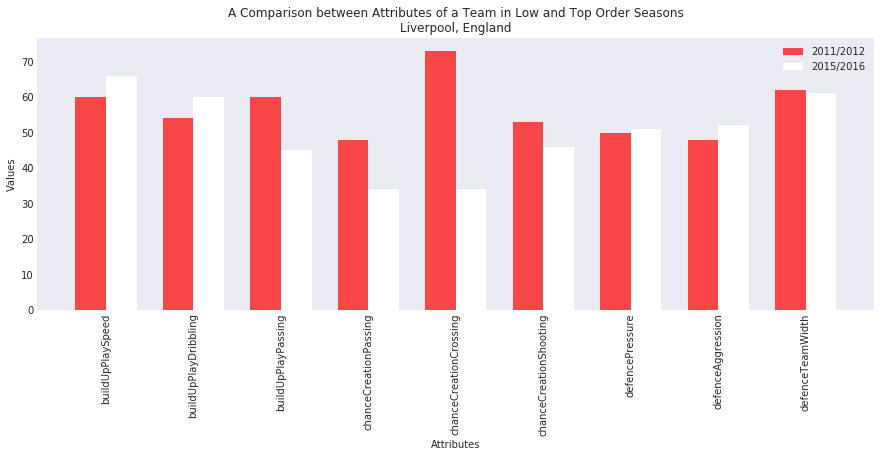

In [57]:
# Plot the attributes in different (low&top) seasons:
width = 0.35
low_label = date_lowest_order
top_label = "2015/2016"
loc_attrs1 = np.arange(1, len(low_attributes) + 1)
loc_attrs2 = loc_attrs1 + width
plt.figure(figsize = (15, 5))
plt.bar(loc_attrs1, low_attributes, width, label = low_label, color='r', alpha=0.7)
plt.bar(loc_attrs2, top_attributes, width, label = top_label, color='w')
xtick_loc = loc_attrs1 + width / 2
xtick_lbl = top_attributes.index
plt.xticks(xtick_loc, xtick_lbl, rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Values')
team_name = df_team.query('team_api_id == {}'.format(team_id))['team_long_name'].values[0]
country_name = df_country.query('id == {}'.format(country_id))['name'].values[0]
title_lbl = team_name + ", " + country_name 
plt.title('A Comparison between Attributes of a Team in Low and Top Order Seasons\n' + title_lbl)
plt.legend();

<a id='conclusions'></a>
## Conclusions


**Do the overall ratings of a player change over time?**
>First, a study shows that there is a positive correlation between the height and weight of each player.<br>

>A right-skewed distributions for each of the height and weight of each player which means the data concentrated towards the lower values from an average value.

>As an attempt to draw a model tells us about the overall rating depending on age, height, and weight. it is found that the model simulates only 14% from the data. It means that the results of a model cannot be efficient at all.

>Lines graph is drawn for the ratings of each 10 players (a size of a random sample) over times/seasons, and each time we choose a sample, it is found that *the overall ratings change over time*.<br>


<br>**What teams improved the most over the time period?**
>After drawing a plot for each country in the (11 countries) to tell us about the teams won during the period of study<br> from 2008/2009 to 2015/2016 (8 seasons), it is found that there are only two or three teams always achieve the victories in a country.<br>


<br>**What team attributes lead to the most victories?**
>Liverpool, England is the selected team to study the difference between the attributes values in the loss and win seasons.<br>
>It is found that all the attributes values in the loss season were higher than the values in the win season except the Build up play speed attribute.
>It is likely to be the build up play speed attribute the key to win. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])